In [23]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.stem.snowball import SnowballStemmer
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('D:\\python\\Titanic_ML\\twitter\\data.csv', sep='\t',quoting=3)

In [4]:
data.head()

,"sentiment,text,user"
0,"""neutral"",""REGISTRTATION OPEN!! and details po..."
1,"""neutral"",""RT @exl_service: Rohit Kapoor, our ..."
2,"""positive"",""Cadre 6 sharing best practices in ..."
3,"""positive"",""Big Data Ethics and 10 Controversi..."
4,"""neutral"",""Our Group Head of Data Science, @sa..."


In [5]:
cols=['sentiment', 'text', 'user']
df=pd.read_csv('D:\\python\\Titanic_ML\\twitter\\data.csv', names=cols)

In [6]:
df.head()

,sentiment,text,user
0,sentiment,text,user
1,neutral,REGISTRTATION OPEN!! and details posted for \C...,"Data &amp; Automation\""… https://t.co/IGnqprj..."
2,neutral,"RT @exl_service: Rohit Kapoor, our Vice Chairm...",vatsalok
3,positive,Cadre 6 sharing best practices in Science. We...,ElemCadre6
4,positive,Big Data Ethics and 10 Controversial Data Scie...,NeXtPlanetRD


In [7]:
df.drop(df.index[0], inplace=True)

In [8]:
df.head()

,sentiment,text,user
1,neutral,REGISTRTATION OPEN!! and details posted for \C...,"Data &amp; Automation\""… https://t.co/IGnqprj..."
2,neutral,"RT @exl_service: Rohit Kapoor, our Vice Chairm...",vatsalok
3,positive,Cadre 6 sharing best practices in Science. We...,ElemCadre6
4,positive,Big Data Ethics and 10 Controversial Data Scie...,NeXtPlanetRD
5,neutral,"Our Group Head of Data Science, @sameerrahman9...",edit_agency


In [9]:
def remove_puntuation(text):
    import string
    transtor=str.maketrans('', '', string.punctuation)
    return text.translate(transtor)

In [10]:
df['text']=df['text'].apply(remove_puntuation)
df.head()

,sentiment,text,user
1,neutral,REGISTRTATION OPEN and details posted for Comp...,"Data &amp; Automation\""… https://t.co/IGnqprj..."
2,neutral,RT exlservice Rohit Kapoor our Vice Chairman a...,vatsalok
3,positive,Cadre 6 sharing best practices in Science We ...,ElemCadre6
4,positive,Big Data Ethics and 10 Controversial Data Scie...,NeXtPlanetRD
5,neutral,Our Group Head of Data Science sameerrahman9 r...,edit_agency


In [11]:
df['length_text']=[len(t) for t in df.text]

In [12]:
df.head()

,sentiment,text,user,length_text
1,neutral,REGISTRTATION OPEN and details posted for Comp...,"Data &amp; Automation\""… https://t.co/IGnqprj...",91
2,neutral,RT exlservice Rohit Kapoor our Vice Chairman a...,vatsalok,133
3,positive,Cadre 6 sharing best practices in Science We ...,ElemCadre6,84
4,positive,Big Data Ethics and 10 Controversial Data Scie...,NeXtPlanetRD,80
5,neutral,Our Group Head of Data Science sameerrahman9 r...,edit_agency,131


In [13]:
sw=stopwords.words('english')
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [14]:
print("number of stopwords: ", len(sw))

number of stopwords:  179


In [15]:
def stop_words(text):
    text=[word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)

In [16]:
df['text']=df['text'].apply(stop_words)
df.head()

,sentiment,text,user,length_text
1,neutral,registrtation open details posted complexity t...,"Data &amp; Automation\""… https://t.co/IGnqprj...",91
2,neutral,rt exlservice rohit kapoor vice chairman amp c...,vatsalok,133
3,positive,cadre 6 sharing best practices science driven ...,ElemCadre6,84
4,positive,big data ethics 10 controversial data science ...,NeXtPlanetRD,80
5,neutral,group head data science sameerrahman9 recently...,edit_agency,131


In [20]:
len(df['text'].iloc[0])

79

In [21]:
df.drop(['user', 'length_text'], axis=1, inplace=True)

In [22]:
df.head()

,sentiment,text
1,neutral,registrtation open details posted complexity t...
2,neutral,rt exlservice rohit kapoor vice chairman amp c...
3,positive,cadre 6 sharing best practices science driven ...
4,positive,big data ethics 10 controversial data science ...
5,neutral,group head data science sameerrahman9 recently...


In [24]:
df['length_text']=[len(t) for t in df.text]

In [25]:
df.head()

,sentiment,text,length_text
1,neutral,registrtation open details posted complexity t...,79
2,neutral,rt exlservice rohit kapoor vice chairman amp c...,117
3,positive,cadre 6 sharing best practices science driven ...,69
4,positive,big data ethics 10 controversial data science ...,76
5,neutral,group head data science sameerrahman9 recently...,109


In [29]:
count_vecorize=CountVectorizer()
count_vecorize.fit(df['text'])
dictionary=count_vecorize.vocabulary_.items()

In [30]:
vocab=[]
count=[]

for key, val in dictionary:
    vocab.append(key)
    count.append(val)
    
vocab_bef_stem=pd.Series(count, index=vocab)
vocab_bef_stem=vocab_bef_stem.sort_values(ascending=False)

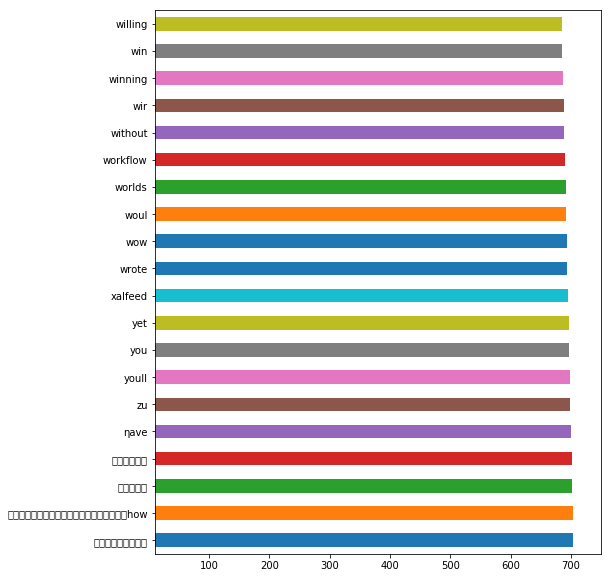

In [45]:
top_vocabs=vocab_bef_stem.head(20)
top_vocabs.plot(kind='barh', figsize=(8,10), xlim=(10,750))

In [38]:
stemmer=SnowballStemmer('english')
def stemming(text):
    text=[stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [39]:
df['text']=df['text'].apply(stemming)
df.head()

,sentiment,text,length_text
1,neutral,registrt open detail post complex transpor sci...,79
2,neutral,rt exlservic rohit kapoor vice chairman amp ce...,117
3,positive,cadr 6 share best practic scienc driven data h...,69
4,positive,big data ethic 10 controversi data scienc expe...,76
5,neutral,group head data scienc sameerrahman9 recent sp...,109


In [41]:
tfid_vectorize=TfidfVectorizer('english')
tfid_vectorize.fit(df['text'])
dictionary=tfid_vectorize.vocabulary_.items()

In [42]:

vocab=[]
count=[]

for key, val in dictionary:
    vocab.append(key)
    count.append(val)
    
vocab_after_stem=pd.Series(count, index=vocab)

vocab_after_stem=vocab_after_stem.sort_values(ascending=False)

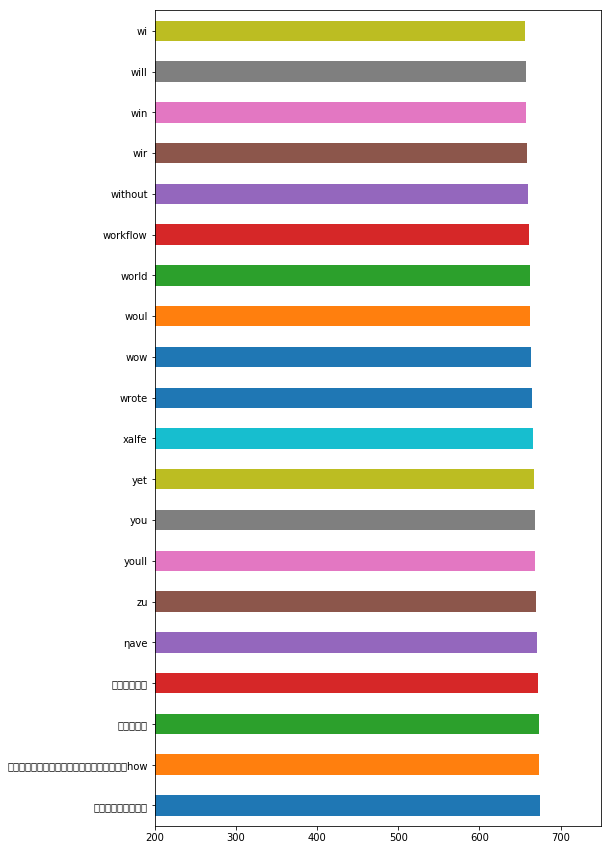

In [44]:

top_vocabs=vocab_after_stem.head(20)
top_vocabs.plot(kind='barh', figsize=(8,15), xlim=(200, 750))

In [47]:
df.head()

,sentiment,text,length_text
1,neutral,registrt open detail post complex transpor sci...,79
2,neutral,rt exlservic rohit kapoor vice chairman amp ce...,117
3,positive,cadr 6 share best practic scienc driven data h...,69
4,positive,big data ethic 10 controversi data scienc expe...,76
5,neutral,group head data scienc sameerrahman9 recent sp...,109


In [48]:
df.drop(['length_text'], axis=1, inplace=True)

In [49]:
df.head()

,sentiment,text
1,neutral,registrt open detail post complex transpor sci...
2,neutral,rt exlservic rohit kapoor vice chairman amp ce...
3,positive,cadr 6 share best practic scienc driven data h...
4,positive,big data ethic 10 controversi data scienc expe...
5,neutral,group head data scienc sameerrahman9 recent sp...


In [50]:
df['length_text']=[len(t) for t in df.text]

In [52]:
df.head()

,sentiment,text,length_text
1,neutral,registrt open detail post complex transpor sci...,57
2,neutral,rt exlservic rohit kapoor vice chairman amp ce...,107
3,positive,cadr 6 share best practic scienc driven data h...,63
4,positive,big data ethic 10 controversi data scienc expe...,67
5,neutral,group head data scienc sameerrahman9 recent sp...,101


In [54]:
N_data=df[df['sentiment']=='neutral']
P_data=df[df['sentiment']=='positive']
Ne_data=df[df['sentiment']=='negative']


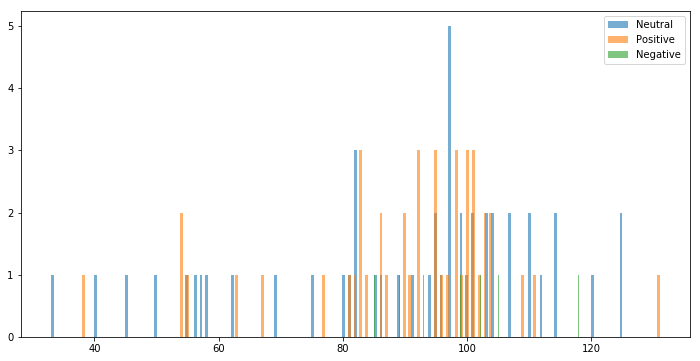

In [59]:
plt.rcParams['figure.figsize']=(12,6)
bins=200
plt.hist(N_data['length_text'], alpha=0.6, bins=bins, label='Neutral')
plt.hist(P_data['length_text'], alpha=0.6, bins=bins, label='Positive')
plt.hist(Ne_data['length_text'], alpha=0.6, bins=bins, label='Negative')

plt.legend()

plt.show()